# Snippets and Programs from Chapter 4: Algebra and Symbolic Math with SymPy

In [16]:
#matplotlib inline

In [15]:
# Page 99: Printing a Series:

'''
Print the series:
    x**2   x**3   x**n
x + ---- + ---- + ----
      2      3      n
'''

from sympy import Symbol, pprint, init_printing

def print_series(n):

    # Initial printing system with reverse order
    init_printing(order='rev-lex')
    x = Symbol('x')
    series = x
    for i in range(2, n+1):
        series = series + (x**i)/i
    pprint(series)

    
if __name__ == '__main__':
    n = input('Enter the number of terms you want in the series: ')
    print_series(int(n))

Enter the number of terms you want in the series: 10
     2    3    4    5    6    7    8    9    10
    x    x    x    x    x    x    x    x    x  
x + ── + ── + ── + ── + ── + ── + ── + ── + ───
    2    3    4    5    6    7    8    9     10


In [27]:
# Page 100: Substituting in Values

from sympy import Symbol
x = Symbol('x')
y = Symbol('y')
expr = x**2 + 2*x*y + y**2
res = expr.subs({x:1, y:2})
print(res)
expr.subs({x:1-y})

9


In [36]:
# Page 102: Print a series and also calculate its value at a certain point

'''
Print the series:

x + x**2 + x**3 + ... + x**n
    ____  _____         ____    
      2     3             n
      
and calculate its value at a certain value of x.
'''

from sympy import Symbol, pprint, init_printing

def print_series(n, x_value):
    
    #Initialize printing system with reverse order
    init_printing(order='rev-lex')
    
    x = Symbol('x')
    series = x
    for i in range(2, n+1):
        series += (x**i)/i
        
    pprint(series)
    
    # Evaluate the series at x_values
    series_values = series.subs({x:x_value})
    print(f'Value of the series at {x_value}: {series_values:.2f}')
    
    
if __name__ == '__main__':
    n = input('Enter the number of terms you want in the series: ')
    x_value = input('Enter the value of x at which you want to evaluate the series: ')
    
    print_series(int(n), float(x_value))

Enter the number of terms you want in the series: 5
Enter the value of x at which you want to evaluate the series: 1.2
     2    3    4    5
    x    x    x    x 
x + ── + ── + ── + ──
    2    3    4    5 
Value of the series at 1.2: 3.51


In [43]:
# Page 104: Expression multiplier

'''
Product of two expressions
'''

from sympy import expand, sympify, pprint
from sympy.core.sympify import SympifyError

def product(expr1, expr2):
    prod = expand(expr1*expr2)
    pprint(prod)
    
if __name__=='__main__':
    expr1 = input('Enter the first expression: ')
    expr2 = input('Enter the second expression: ')
    try:
        expr1 = sympify(expr1)
        expr2 = sympify(expr2)
    except SympifyError:
        print('Invalid input')
    else:
        product(expr1, expr2)

Enter the first expression: x + 2
Enter the second expression: y + 3
6 + 2⋅y + 3⋅x + x⋅y


In [45]:
# Page 105: Solving a linear equation

from sympy import Symbol, solve 

x = Symbol('x')
expr = x - 5 - 7
solve(expr)

In [46]:
# Page 106: Solving Quadratic Equations

from sympy import Symbol, solve

x = Symbol('x')
expr = x**2 + 5*x + 4
solve(expr, dict=True)

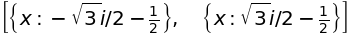

In [47]:
# Page 106: Quadratic equation with imaginary roots

from sympy import Symbol, solve

x = Symbol('x')
expr = x**2 + x + 1
solve(expr, dict=True)

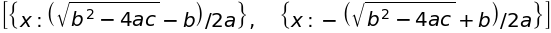

In [52]:
# Page 106-107: Solving for one variance in terms of others

from sympy import Symbol, solve

x = Symbol('x')
a = Symbol('a')
b = Symbol('b')
c = Symbol('c')
expr = a*x*x + b*x + c
solve(expr, x, dict=True)

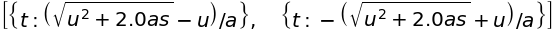

In [55]:
# Page 107: Express s in terms of u, a, t

from sympy import Symbol, solve

s = Symbol('s')
u = Symbol('u')
t = Symbol('t')
a = Symbol('a')
expr = u*t + (1/2)*a*t**2 - s
t_expr = solve(expr, t, dict=True)
t_expr

In [69]:
# Page 108: Solve a system of Linear equations

from sympy import Symbol, solve, pprint

x = Symbol('x')
y = Symbol('y')
expr1 = 2*x + 3*y - 6
expr2 = 3*x + 2*y - 12
soln = solve((expr1, expr2), dict=True)
pprint(f'solution that satisfies both equations: {soln}')

# verify whether the solution we got really satisfies the equations
soln = soln[0]
pprint('First expression result: {0}'.format(expr1.subs({x:soln[x], y:soln[y]})))
pprint('Second expression result: {0}'.format(expr2.subs({x:soln[x], y:soln[y]})))

solution that satisfies both equations: [{x: 24/5, y: -6/5}]
First expression result: 0
Second expression result: 0


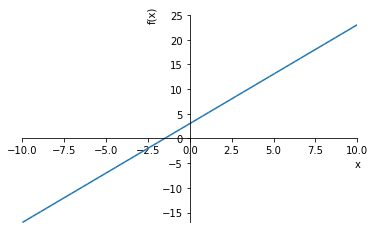

In [70]:
# Page 109: Simple plot with SymPy

from sympy.plotting import plot
from sympy import Symbol

x = Symbol('x')
plot(2*x+3)

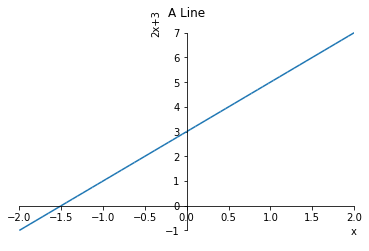

In [72]:
# Page 110: Plot in SymPy with range of x as well as other attributes specified

from sympy import Symbol, plot

x = Symbol('x')
plot(2*x+3, (x, -2, 2), title='A Line', xlabel='x', ylabel='2x+3')

Enter your expression in terms of x and y: -2*x + 3*y + 10


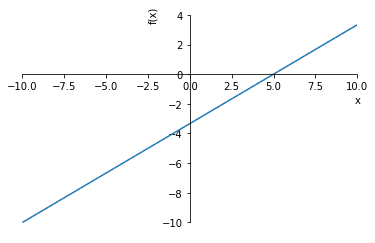

In [79]:
# Page 112: Plot the graph of an input expression

'''
Plot the graph of an input expression
'''

from sympy import Symbol, sympify, solve
from sympy.plotting import plot


def plot_expression(expr):
    
    y = Symbol('y')
    solutions = solve(expr, y)
    expr_y = solutions[0]
    plot(expr_y)
    

if __name__ == '__main__':
    
    expr = input('Enter your expression in terms of x and y: ')
    try:
        expr = sympify(expr)
    except SympifyError:
        print('Invalid input')
    else:
        plot_expression(expr)

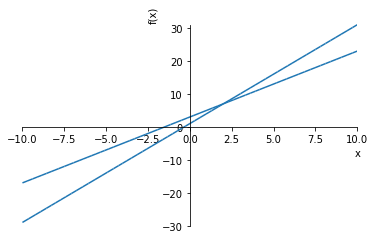

In [80]:
# Page 113: Plotting multiple functions

from sympy.plotting import plot
from sympy import Symbol

x = Symbol('x')
plot(2*x+3, 3*x+1)

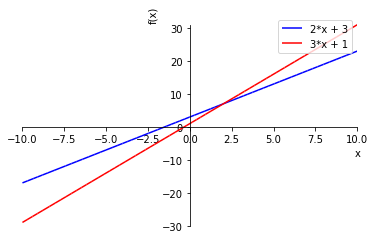

In [82]:
# Page 114: Plot of the two lines drawn in a different color

from sympy.plotting import plot
from sympy import Symbol

x = Symbol('x')
p = plot(2*x+3, 3*x+1, legend=True, show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()